##Hypothesis testing of difference between two populations
###Given data contains Air Quality Indices of two pollution monitor stations in Bengaluru from 1st Jan 2020 to 20th October 2021.

In [ ]:
import pandas as pd
df=pd.read_csv("twopop.csv",na_values='None')
df.fillna(value=0.0,inplace=True)
df.head()

In [9]:
import random as rd
import statistics as st
samp1=rd.sample(list(df['PM2.5']),40)
samp2=rd.sample(list(df['PM2.5.1']),40)
x1=st.mean(samp1)
x2=st.mean(samp2)

###**Population Means**: Ho:(mu1-mu2)<=(or)>=(or)=0
###1.Population standard deviations known and samples are independent:

---


###In this case the standard deviations of the two populations are already known. We consider the distribution of the difference of the sample means from the two populations.
###Similar to one sample test the z statistic remains same except that:
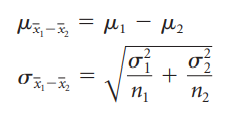
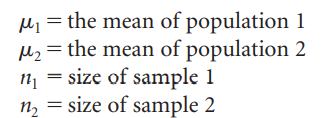
###Thus the p value can be found by substituting the values in the Z test. There is no formula in python for Z test.

---
###2.Population standard deviations not known and samples are independent:

---




###In this case we make use of the t test. Python provides ttest for two samples too, not just one. 
###We import scipy.stats and use the ttest_ind() function on both the samples.
###If the sample variances are equal then we make the equal_var attribute of the above function as True otherwise False.
###The way of rejection remains same that is if pvalue<alpha we reject, otherwise we do not.

---
###3.Population means related samples:

---

###Here the samples are form two related poplns.
###(Eg:water quality before and after treatment).
###In python, ttest can also be performed for dependent samples.
###We use ttest_rel() instead of ttest_int()






In [ ]:
#ttest for independent samples where population standard deviations are not known.
import scipy.stats as sc
if(st.pvariance(samp1)==st.pvariance(samp2)):
 print(sc.ttest_ind(samp1,samp2,equal_var=True))
else:
 print(sc.ttest_ind(samp1,samp2,equal_var=False))

###**Population proportion:**Ho:p1-p2<=(or)>=(or)=0

---


###In this case the test statistic will be 
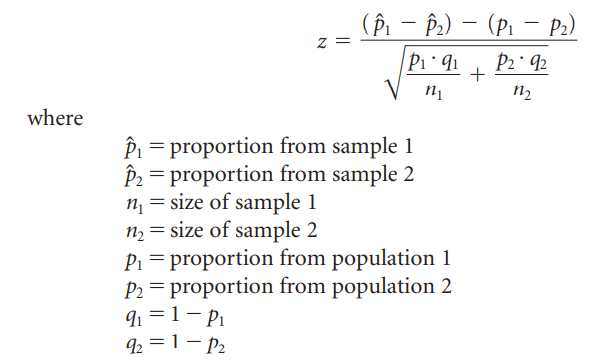

###F Distribution:It is similar to chi square distribution but the f statistic is 
###f= (s1^2*sigma2^2)/(s2^2*sigma1^2)

In [ ]:
l1=[]
sig1=st.pstdev(df['PM2.5'])
sig2=st.pstdev(df['PM2.5.1'])
for i in range(20):
  samp1=rd.sample(list(df['PM2.5']),20)
  samp2=rd.sample(list(df['PM2.5.1']),20)
  s1=st.pvariance(samp1)
  s2=st.pvariance(samp2)
  f=(s1*(sig2**2))/(s2*(sig1**2))
  l1.append(f)
import matplotlib.pyplot as plt
import seaborn as sb
sb.kdeplot(l1)
plt.show()

###**Population variances:**Ho:sigma1^2<=(or)=sigma2^2

---


###In this case the test statistic is f statistic. Thus we consider the ratio of the population variances for the hypothesis. 
###Here the ratio must fall in the confidence interval given by 
###(s1^2/s2^2)xf(n1-1,n2-1,1-alpha/2) to (s1^2/s2^2)xf(n1-1,n2-1,alpha/2)
###where alpha is the level of significance.
###In python, we can make use of scipy.stats.f.ppf() to find the f statistic corresponding to the boundaries of the CI.
###Then we can check if the F statistic falls within the interval or not.
###If f lies within CI then Ho is not rejected, else it is rejected.

In [ ]:
#Let alpha be 0.05 for the F Test
ci1=sc.f.ppf(q=0.05,dfn=19,dfd=19)
ci2=sc.f.ppf(q=0.95,dfn=19,dfd=19)
print("Confidence Interval is from",ci1," to ",ci2)
#Find the F statistic
samp1=rd.sample(list(df['PM2.5']),40)
samp2=rd.sample(list(df['PM2.5.1']),40)
s1=st.pvariance(samp1)
s2=st.pvariance(samp2)
f=(s1*(sig2**2))/(s2*(sig1**2))
if(f>ci1 and f<ci2):
  print("Ho:sigma1=sigma2 is not rejected")
else:
  print("Ho:sigma1=sigma2 is rejected")